In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import random
import os
from scipy.interpolate import interp1d
import tqdm

In [3]:
# CONSTANTS & PARAMETERS
Na = 19                
Nc = 11               
G0 = 1.7              
lab_IP = 8.6          
fy = 10              
J_Er = 1.5 * 10**(-7)
T_ISM = 80
ne = 7.5 * 10**(-3)

# PAH FUNCTIONS
def approx_surface_area_pah(Nc): 
    s_area = 5 * 10**(-16) * Nc
    return s_area

def approx_radius_pah(Nc):
    a = 0.9 * 10**(-8) * np.sqrt(Nc)
    return a

def FUV_absorption_cross_section(Nc):
    sigma = 7 * 10**(-18) * Nc
    return sigma

def UV_absorption_timescale(Nc,G0):
    t_UV = 1.4 * 10**(9) / (Nc*G0)
    return t_UV

def vibrational_degrees_of_freedom(Na):
    return 3*Na - 6

def ionization_potential(Z, Nc):
    IP = 4.4 + (Z + 0.5) * 25.1/np.sqrt(Nc)
    return IP

def photo_el_ionization_rate(Nc, G0, fy):
    J_pe = 2.5 * 10**(-13) * (13.6-lab_IP)**2 * Nc * G0 * fy
    return J_pe

# def neutral_fraction(Nc, G0, T_ISM, J_Er, J_Pe, ne):
#     # y0 = (J_Pe / J_Er) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
#     # y1 = 3.5 * 10**(-6) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
#     # y2 = 1.3 * 10**(-4) * np.sqrt(Nc) * G0 * np.sqrt(T_ISM) / ne
#     y4 = (J_Pe / J_Er * ne) 
#     #factor = (J_Pe / J_Er) 
#     f0 = 1/(1 + y4)
#     return f0

# CALCULATIONS
print("Vibrational degrees of freedom:", vibrational_degrees_of_freedom(Na))
print("Surface area:", approx_surface_area_pah(Nc), "cm^2")
print("Radius:", approx_radius_pah(Nc), "cm")
print("FUV cross section:", FUV_absorption_cross_section(Nc), "cm^2")
print("UV absorption timescale:", UV_absorption_timescale(Nc, G0), "seconds", "which is equivalent to ", UV_absorption_timescale(Nc, G0) / 3.154e7, "years")
print("Ionization potential (Z=0):", ionization_potential(0, Nc), "eV", "and the laboratory value for 1-cyanonaphthalene has been measured to be 8.59 - 8.61 eV")
print("Ionization potential (Z=1):", ionization_potential(1, Nc), "eV")
print("Photoelectron ionization rate:", photo_el_ionization_rate(Nc, G0, fy), "electrons s^-1")
#print("Neutral fraction:", neutral_fraction(Nc, G0, T_ISM, J_Er, photo_el_ionization_rate(Nc, G0, fy), ne), "which is the ratio of neutral to ionized PAHs")

Vibrational degrees of freedom: 51
Surface area: 5.5e-15 cm^2
Radius: 2.98496231131986e-08 cm
FUV cross section: 7.7e-17 cm^2
UV absorption timescale: 74866310.16042781 seconds which is equivalent to  2.3736940444016428 years
Ionization potential (Z=0): 8.183967374450933 eV and the laboratory value for 1-cyanonaphthalene has been measured to be 8.59 - 8.61 eV
Ionization potential (Z=1): 15.751902123352803 eV
Photoelectron ionization rate: 1.1687500000000001e-09 electrons s^-1


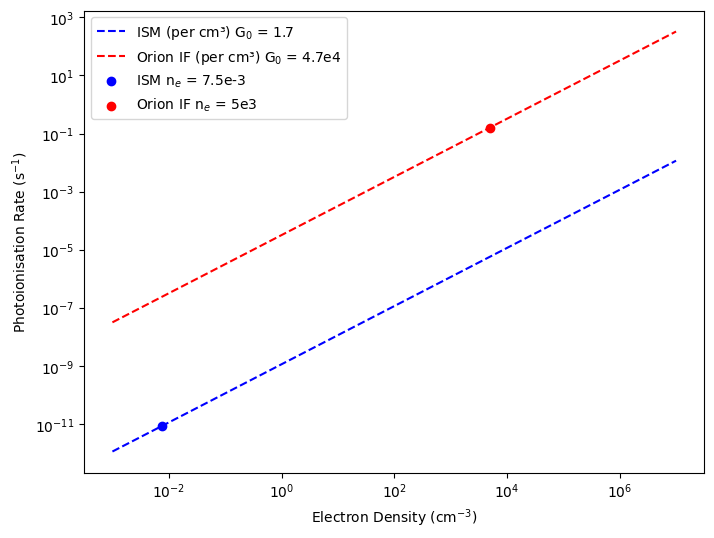

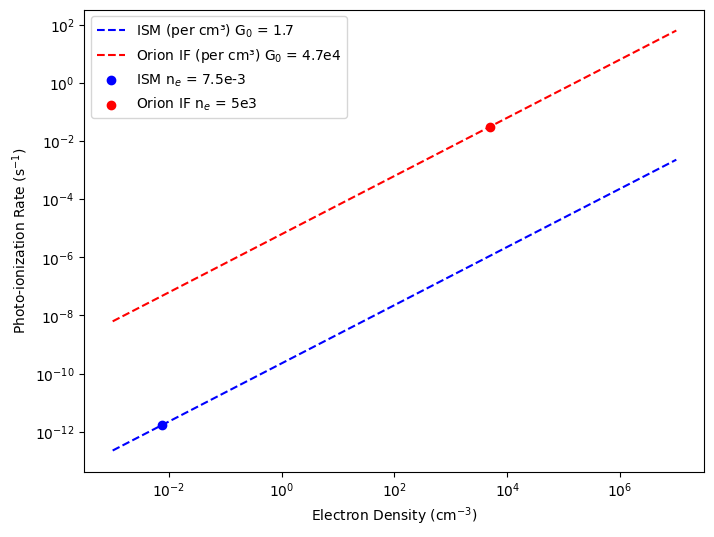

In [4]:
# CONSTANTS
Nc = 11
N_lab_IP = 8.6 
C_estimate_IP = 15.8
fy = 10 # Yield factor for PAHs

# ASTROPHYSICAL REGION PARAMETERS
G0_ISM = 1.7 # From Tiemens et al. 2015                             
T_ISM = 80
ne_ISM = 7.5 * 10**(-3)

G0_Orion_IF = 4.7 * 10 ** 4 # IF = Ionization front, derived for the Orion bar (2.2-7.1)
T_Orion_IF = 9 * 10 ** 3 
ne_ORION_IF = 5 * 10 ** 3

# G0_TMC = 9
# T_TMC = 15
electrondensity_list = np.logspace(-3, 7, num=10000)  # electron density list in cm^-3
ISM_photoion_rate = []
Orion_IF_photoion_rate = []

def photo_el_ionization_rate(Nc, G0, fy, lab_IP):
    J_pe = 2.5 * 10**(-13) * (13.6-lab_IP)**2 * Nc * G0 * fy
    return J_pe

N_ISM_photoion_rate = photo_el_ionization_rate(Nc, G0_ISM, fy, N_lab_IP)
N_Orion_IF_photoion_rate= photo_el_ionization_rate(Nc, G0_Orion_IF, fy, N_lab_IP)

C_ISM_photoion_rate = photo_el_ionization_rate(Nc, G0_ISM, fy, C_estimate_IP)
C_Orion_IF_photoion_rate = photo_el_ionization_rate(Nc, G0_Orion_IF, fy, C_estimate_IP)

N_ISM_photoion_rate_per_volume = N_ISM_photoion_rate * electrondensity_list
N_Orion_IF_photoion_rate_per_volume = N_Orion_IF_photoion_rate * electrondensity_list
C_ISM_photoion_rate_per_volume = C_ISM_photoion_rate * electrondensity_list
C_Orion_IF_photoion_rate_per_volume = C_Orion_IF_photoion_rate * electrondensity_list

N_ISM_photoion_point = N_ISM_photoion_rate * ne_ISM
N_Orion_IF_photoion_point = N_Orion_IF_photoion_rate * ne_ORION_IF
C_ISM_photoion_point = C_ISM_photoion_rate * ne_ISM
C_Orion_IF_photoion_point = C_Orion_IF_photoion_rate * ne_ORION_IF

plt.figure(figsize=(8, 6))

plt.plot(electrondensity_list, N_ISM_photoion_rate_per_volume, color='blue', label='ISM (per cm³) G$_{0}$ = 1.7', linestyle='--')
plt.plot(electrondensity_list, N_Orion_IF_photoion_rate_per_volume, color='red', label='Orion IF (per cm³) G$_{0}$ = 4.7e4', linestyle='--')

plt.scatter([ne_ISM], [N_ISM_photoion_point], color='blue', marker='o', label='ISM n$_{e}$ = 7.5e-3')
plt.scatter([ne_ORION_IF], [N_Orion_IF_photoion_point], color='red', marker='o', label='Orion IF n$_{e}$ = 5e3')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Electron Density (cm$^{-3}$)')
plt.ylabel('Photoionisation Rate (s$^{-1}$)')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))

plt.plot(electrondensity_list, C_ISM_photoion_rate_per_volume, color='blue', label='ISM (per cm³) G$_{0}$ = 1.7', linestyle='--')
plt.plot(electrondensity_list, C_Orion_IF_photoion_rate_per_volume, color='red', label='Orion IF (per cm³) G$_{0}$ = 4.7e4', linestyle='--')

plt.scatter([ne_ISM], [C_ISM_photoion_point], color='blue', marker='o', label='ISM n$_{e}$ = 7.5e-3')
plt.scatter([ne_ORION_IF], [C_Orion_IF_photoion_point], color='red', marker='o', label='Orion IF n$_{e}$ = 5e3')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Electron Density (cm$^{-3}$)')
plt.ylabel('Photo-ionization Rate (s$^{-1}$)')
plt.legend()
plt.show()

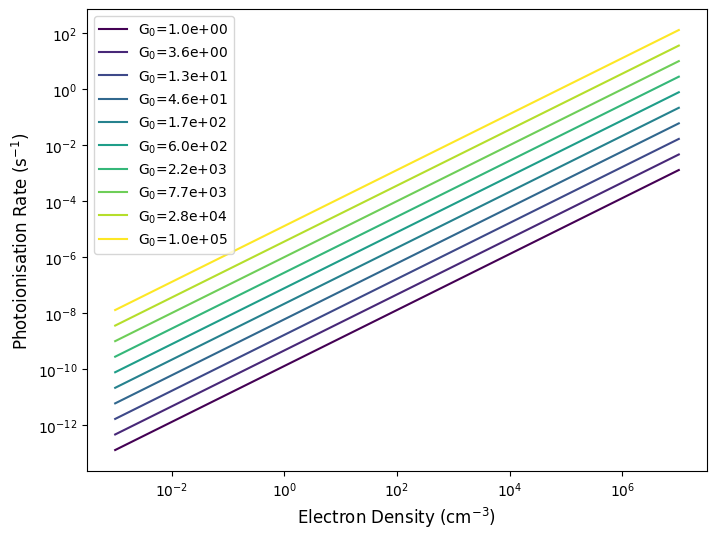

In [5]:
G0_list = np.logspace(0, 5, num=10)  # 10 steps from 1 to 1e5
electron_density = electrondensity_list

plt.figure(figsize=(8, 6))
colors = cm.viridis(np.linspace(0, 1, len(G0_list)))  # Get 10 colors from viridis

for idx, G0 in enumerate(G0_list):
    N_rate_per_molecule = photo_el_ionization_rate(Nc, G0, fy, C_estimate_IP)
    N_rate_per_volume = N_rate_per_molecule * electron_density
    plt.plot(electron_density, N_rate_per_volume, color=colors[idx], label=f'G$_{0}$={G0:.1e}')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Electron Density (cm$^{-3}$)', fontsize=12)
plt.ylabel('Photoionisation Rate (s$^{-1}$)', fontsize=12)
plt.show()

# G0_list = np.logspace(0, 5, num=10)  # 10 steps from 1 to 1e5
# electron_density = electrondensity_list

# plt.figure(figsize=(8, 6))
# colors = cm.viridis(np.linspace(0, 1, len(G0_list)))  # Get 10 colors from viridis

# for idx, G0 in enumerate(G0_list):
#     C_rate_per_molecule = photo_el_ionization_rate(Nc, G0, fy, C_estimate_IP)
#     C_rate_per_volume = C_rate_per_molecule * electron_density
#     plt.plot(electron_density, C_rate_per_volume, color=colors[idx], label=f'G$_{0}$={G0:.1e}')

# plt.xscale('log')
# plt.yscale('log')
# plt.legend()
# plt.xlabel('Electron Density (cm$^{-3}$)')
# plt.ylabel('Photo-ionization Rate (s$^{-1}$)')
# plt.show()

### Calculating the vibrational & rotational partition functions

In the case of cyanonapthalene, the most likely bond to break in the molecule would be the -CN bond as given by the reaction here:
C10H7CN+ → C10H6+ + HCN + ϵ (where ϵ is the kinetic energy)

In [6]:
# WAVENUMBER DATA
N1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\filtered_frequencies\strong_frequencies_neutral1cyano.csv', header=None).squeeze().tolist()
C1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\filtered_frequencies\strong_frequencies_cation1cyano.csv', header=None).squeeze().tolist()
TS_N1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\filtered_frequencies\transition_strong_frequencies_neutral1cyano.csv', header=None).squeeze().tolist()
TS_C1cyano_wavenumbers_list = pd.read_csv(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\filtered_frequencies\transition_strong_frequencies_cation1cyano.csv', header=None).squeeze().tolist()
# PRINCIPAL MOMENTS OF INERTIA DATA & CONVERSION FACTORS
inertia_factor_amuAng = 1.6605390666000002e-47 # Principal moment of inertia from amu*angstrom^2 to kg*m^2
inertia_factor_au = 1.992851882e-46 # Principal moments of inertia from atomic units to kg*m^2

N1cyano_principal_moments = [341.37767327 * inertia_factor_amuAng, 532.72832397 * inertia_factor_amuAng, 874.10599724 * inertia_factor_amuAng] # Principal moments of inertia in kg*m^2
C1cyano_principal_moments = [341.39046846 * inertia_factor_amuAng, 535.88368599 * inertia_factor_amuAng, 877.27415445 * inertia_factor_amuAng]
TS_N1cyano_principal_moments = [1219.483541 * inertia_factor_au, 960.954403 * inertia_factor_au,  180.43794 * inertia_factor_au] 
TS_C1cyano_principal_moments = [1322.144212 * inertia_factor_au, 337.032003 * inertia_factor_au, 659.17620 * inertia_factor_au]

# CONSTANTS & PARAMETERS
c_cm = 2.99792458e10  # Speed of light in cm/s, since cm_freq is given in cm^-1
h = 6.62607015e-34 # Planck's constant in J/Hz
k_B = 1.380649e-23 # Boltzmann's constant in J/K
symmetry_number = 1 # 1-cyanonaphthalene is structurally asymmetric (also seen in principal moment inertias), so the symmetry number is 1. Also given in sigma notation
T_eval = 1000 # Temperature in K, evaluation of the partition function at 1000 K is done to see how many vibrational states are accessible at this temperature.

# FUNCTIONS
def scale_frequencies(wavenumber_list, scale_factor=0.96):
    return [freq * scale_factor for freq in wavenumber_list]

def vibrational_partition_function(wavenumbers_list, T):
    cm_freqs = np.array(wavenumbers_list)
    hz_freqs = cm_freqs * c_cm
    char_vib_temps = h * hz_freqs / k_B
    q_vibs = 1 / (1 - np.exp(-char_vib_temps / T))
    return np.prod(q_vibs)

def rotational_partition_function(symmetry_number, principal_moments, T):
    return (np.pi**2 / symmetry_number) * \
           np.sqrt(8*np.pi*principal_moments[0] * k_B*T / h**2) * \
           np.sqrt(8*np.pi*principal_moments[1] * k_B*T / h**2) * \
           np.sqrt(8*np.pi*principal_moments[2] * k_B*T / h**2)

def compute_partition_functions(wavenumbers_list, principal_moments, T, symmetry_number=1):
    q_vib = vibrational_partition_function(wavenumbers_list, T)
    q_rot = rotational_partition_function(symmetry_number, principal_moments, T)
    return q_vib, q_rot

# CALCULATIONS
scaled_TS_N_freqs = scale_frequencies(TS_N1cyano_wavenumbers_list, 0.96)
scaled_TS_C_freqs = scale_frequencies(TS_C1cyano_wavenumbers_list, 0.96)

q_vib_N, q_rot_N = compute_partition_functions(N1cyano_wavenumbers_list, N1cyano_principal_moments, T_eval)
q_vib_C, q_rot_C = compute_partition_functions(C1cyano_wavenumbers_list, C1cyano_principal_moments, T_eval)
q_vib_TS_N, q_rot_TS_N = compute_partition_functions(scaled_TS_N_freqs, TS_N1cyano_principal_moments, T_eval)
q_vib_TS_C, q_rot_TS_C = compute_partition_functions(scaled_TS_C_freqs, TS_C1cyano_principal_moments, T_eval)

print("Vibrational partition function (neutral 1-cyanonaphthalene):", q_vib_N, "The rotational partition function (neutral 1-cyanonaphthalene):", q_rot_N)
print("Vibrational partition function (cation 1-cyanonaphthalene):", q_vib_C, "The rotational partition function (cation 1-cyanonaphthalene):", q_rot_C)
print("Vibrational partition function (transition state neutral 1-cyanonaphthalene):", q_vib_TS_N, "The rotational partition function (transition state neutral 1-cyanonaphthalene):", q_rot_TS_N)
print("Vibrational partition function (transition state cation 1-cyanonaphthalene):", q_vib_TS_C, "The rotational partition function (transition state cation 1-cyanonaphthalene):", q_rot_TS_C)

Vibrational partition function (neutral 1-cyanonaphthalene): 5.544077488182599 The rotational partition function (neutral 1-cyanonaphthalene): 5916195.513425924
Vibrational partition function (cation 1-cyanonaphthalene): 25.157890192110596 The rotational partition function (cation 1-cyanonaphthalene): 5944545.396059827
Vibrational partition function (transition state neutral 1-cyanonaphthalene): 61684.14685472909 The rotational partition function (transition state neutral 1-cyanonaphthalene): 283682270.69831663
Vibrational partition function (transition state cation 1-cyanonaphthalene): 341272.7354960699 The rotational partition function (transition state cation 1-cyanonaphthalene): 334352555.04264796


The entropy change is: 114.9790074774605 cal/mol K
The entropy change is: 99.77995440629475 cal/mol K


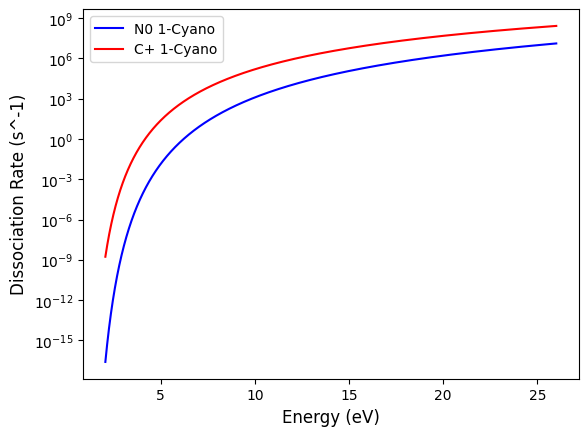

In [7]:
# CONSTANTS & PARAMETERS
h_eV = 4.135667696e-15 # Planck's constant in eV/Hz
k_B = 1.380649e-23 # Boltzmann's constant in J/K
R_gas = 8.31446261815324 # Ideal gas constant in J/(mol*K)
Na = 6.02214076e23 # Avogadro's number in mol^-1
T_eval = 1000 # Temperature in K, evaluation of the partition function at 1000 K is done to see how many vibrational states are accessible at this temperature.
max_photon_frequency = 6286772e9
min_photon_frequency = 5.0e14 
C_bond_energy = 3.16 # The dissocation/activation energy of the HCN bond of cation 1-cyanonaphthalene in eV, given in the paper by H. Stockett et al. (2023) DOI: 10.1038/s41557-023-01283-0.
N_bond_energy = 3.85 # Estimate of the activation energy for neutral 1-cyanonaphthalene, recommended by supervisor

# LISTS
k_diss_N_list = [] 
k_diss_C_list = [] 
NC_energies_list = [] 
frequency_list = np.logspace(np.log10(min_photon_frequency),np.log10(max_photon_frequency),num=10000) # Arrays of frequencies in Hz,adjust num for resolution

# FUNCTIONS
def d_entropy(q_vib_parent, q_rot_parent, q_vib_transition, q_rot_transition, activation_energy, T):
    delta_S = k_B * np.log((q_vib_transition * q_rot_transition) / (q_vib_parent * q_rot_parent)) + ((activation_energy * 1.602e-19) / T) 
    return delta_S

def PAH_effective_temperature(light_freq, Nc, bond_energy):
    T_eff = 2000 * ((h_eV * light_freq) / Nc) ** 0.4 * (1 - 0.2 * bond_energy / (h_eV * light_freq)) # energies in eV
    return T_eff

def pre_exponential_factor(T_eff, delta_S):
    k0 = k_B * T_eff / h * np.exp(1 + delta_S / R_gas)
    return k0

def unimolecular_dissociation_rate(k0, T_eff, bond_energy):
    k_diss = k0 * np.exp(-bond_energy * 1.602e-19 / (k_B * T_eff)) # energies in eV
    return k_diss

# CALCULATIONS
delta_S_N = d_entropy(q_vib_N, q_rot_N, q_vib_TS_N, q_rot_TS_N, N_bond_energy, T_eval)
delta_S_C = d_entropy(q_vib_C, q_rot_C, q_vib_TS_C, q_rot_TS_C, C_bond_energy, T_eval)
print("The entropy change is:", (delta_S_N * Na / 4.184), "cal/mol K") # Convert to cal/mol K
print("The entropy change is:", (delta_S_C * Na / 4.184), "cal/mol K") # Convert to cal/mol K

for i in frequency_list:
    N_T_eff = PAH_effective_temperature(i, Nc, N_bond_energy)
    C_T_eff = PAH_effective_temperature(i, Nc, C_bond_energy) 
    NC_energies_list.append(h_eV * i) 
    
    k0_N = pre_exponential_factor(N_T_eff, delta_S_N)
    k_diss_N = unimolecular_dissociation_rate(k0_N, N_T_eff, N_bond_energy)
    k_diss_N_list.append(k_diss_N) 

    k0_C = pre_exponential_factor(C_T_eff, delta_S_C)
    k_diss_C = unimolecular_dissociation_rate(k0_C, C_T_eff, C_bond_energy)
    k_diss_C_list.append(k_diss_C) 

# OPTIONAL PLOTTING
plt.plot(NC_energies_list, k_diss_N_list, label='N0 1-Cyano', color='blue')
plt.plot(NC_energies_list, k_diss_C_list, label='C+ 1-Cyano', color='red')
plt.legend()
plt.xlabel('Energy (eV)', fontsize=12)
plt.ylabel('Dissociation Rate (s^-1)', fontsize=12)
plt.yscale('log')
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\Teff_rates.png')

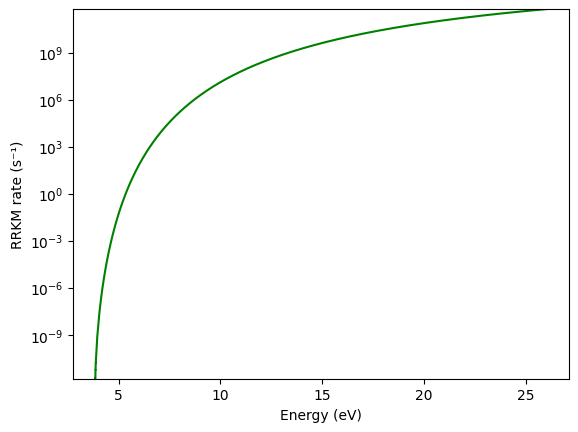

In [8]:
# DENSUM OUTPUT DATA
df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\1-cyanonaphthalene\vibs\densum.out',
    skiprows=115,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\TS-1-cyanonaphthalene\vibs\TSdensumout_26eV.out',
    skiprows=114,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
h_wavenumber = 4.135667696e-15 * 8065.56 # Planck's constant in eV/cm^-1
E0_cm = 31052                            # Activation energy in cm^-1 (rounded to cm_grain)
cm_to_eV = 1.239841984e-4                
cm_grain = 10

# LISTS
density_of_states_list = df1["Density"].tolist()
TS_sum_of_states_list = df2["Sum"].tolist()
energies_list = df1["E-Emin"].tolist()
N_k_RRKM_list = []
filtered_energies_list = []

# FUNCTIONS
def RRKM_dissociation_rate(reaction_degen, TS_sum_of_states, density_of_states):
    return (reaction_degen * TS_sum_of_states) / (h_wavenumber * density_of_states)

# CALCULATIONS
for energy, density in zip(energies_list, density_of_states_list):
    if energy <= E0_cm:
        # print("Energy below threshold:", energy)
        continue

    E_available = energy - E0_cm
    # print("E_available:", E_available)
    index = int(E_available / cm_grain)
    # print("Index:", index)

    TS_sum_val = TS_sum_of_states_list[index]
    #print("sum of states:", TS_sum_val, "and density of states:", density)
    k = RRKM_dissociation_rate(reaction_degen=1, TS_sum_of_states=TS_sum_val, density_of_states=density)
    N_k_RRKM_list.append(k)
    filtered_energies_list.append(energy)

# Converts energies from cm^-1 to eV
N_RRKM_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(N_RRKM_filtered_energies_list_eV, N_k_RRKM_list, color='green')
plt.xlabel('Energy (eV)')
plt.ylabel('RRKM rate (s⁻¹)')
plt.yscale('log')
plt.ylim(min(N_k_RRKM_list), max(N_k_RRKM_list))
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\N_RRKM.png')


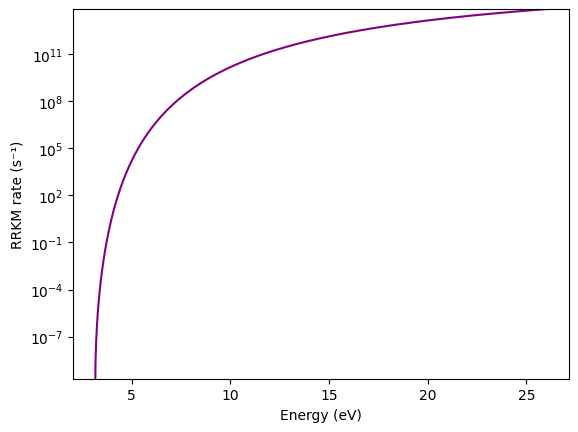

In [9]:
# DENSUM OUTPUT DATA
df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-1-cyanonaphthalene\vibs\densum.out',
    skiprows=115,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\TS-C-1-cyanonaphthalene\vibs\densum.out',
    skiprows=114,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
h_wavenumber = 4.135667696e-15 * 8065.56
E0_cm = 25490                           
cm_to_eV = 1.239841984e-4                
cm_grain = 10

# LISTS
density_of_states_list = df1["Density"].tolist()
TS_sum_of_states_list = df2["Sum"].tolist()
energies_list = df1["E-Emin"].tolist()
C_k_RRKM_list = []
filtered_energies_list = []

# FUNCTIONS
def RRKM_dissociation_rate(reaction_degen, TS_sum_of_states, density_of_states):
    return (reaction_degen * TS_sum_of_states) / (h_wavenumber * density_of_states)

# CALCULATIONS
for energy, density in zip(energies_list, density_of_states_list):
    if energy <= E0_cm:
        continue

    E_available = energy - E0_cm
    index = int(E_available / cm_grain)

    TS_sum_val = TS_sum_of_states_list[index]
    k = RRKM_dissociation_rate(reaction_degen=1, TS_sum_of_states=TS_sum_val, density_of_states=density)
    C_k_RRKM_list.append(k)
    filtered_energies_list.append(energy)

C_RRKM_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(C_RRKM_filtered_energies_list_eV, C_k_RRKM_list, color='purple')
plt.xlabel('Energy (eV)')
plt.ylabel('RRKM rate (s⁻¹)')
plt.yscale('log')
plt.ylim(min(C_k_RRKM_list), max(C_k_RRKM_list))
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\C_RRKM.png')

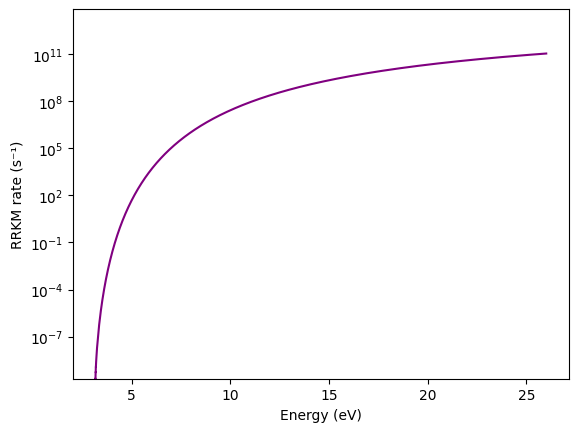

In [10]:
# DENSUM OUTPUT DATA
df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-1-cyanonaphthalene\vibs\densum.out',
    skiprows=115,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\other-TS-C-1-cyanonaphthalene\vibs\densum.out',
    skiprows=114,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
h_wavenumber = 4.135667696e-15 * 8065.56
E0_cm = 25490                           
cm_to_eV = 1.239841984e-4                
cm_grain = 10

# LISTS
density_of_states_list = df1["Density"].tolist()
TS_sum_of_states_list = df2["Sum"].tolist()
energies_list = df1["E-Emin"].tolist()
other_C_k_RRKM_list = []
filtered_energies_list = []

# FUNCTIONS
def RRKM_dissociation_rate(reaction_degen, TS_sum_of_states, density_of_states):
    return (reaction_degen * TS_sum_of_states) / (h_wavenumber * density_of_states)

# CALCULATIONS
for energy, density in zip(energies_list, density_of_states_list):
    if energy <= E0_cm:
        continue

    E_available = energy - E0_cm
    index = int(E_available / cm_grain)

    TS_sum_val = TS_sum_of_states_list[index]
    k = RRKM_dissociation_rate(reaction_degen=1, TS_sum_of_states=TS_sum_val, density_of_states=density)
    other_C_k_RRKM_list.append(k)
    filtered_energies_list.append(energy)

other_C_RRKM_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, color='purple')
plt.xlabel('Energy (eV)')
plt.ylabel('RRKM rate (s⁻¹)')
plt.yscale('log')
plt.ylim(min(C_k_RRKM_list), max(C_k_RRKM_list))
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\other_C_RRKM.png')

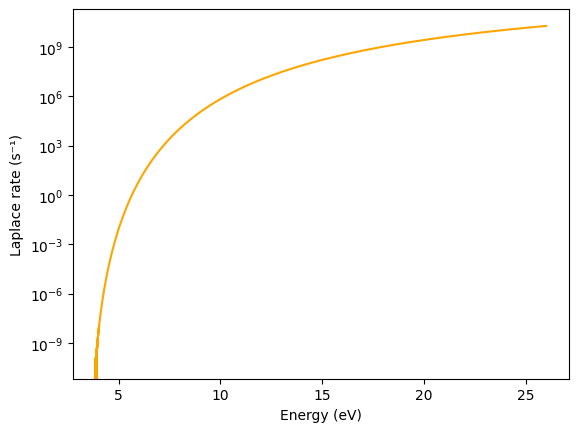

In [11]:
# INVERSE LAPLACE DISSOCIATON RATE

# DOS DATA
df = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\1-cyanonaphthalene\vibs\densum.out',
    skiprows=115,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
T_eff = 1000
h = 6.62607015e-34 
k_B = 1.380649e-23 
E0_cm = 31052                          
cm_to_eV = 1.239841984e-4
cm_grain = 10

# LISTS
N_k_Laplace_list = []
filtered_energies_list = []
energies_list = df["E-Emin"]
density_of_states_list1 = df["Density"].tolist()
density_of_states_list2 = df["Density"].tolist()

# FUNCTIONS
def pre_exponential_factor_1000K(T_eff):
    A_diss_1000K = k_B * T_eff / h
    return A_diss_1000K

def Laplace_dissociation_rate(A_diss_1000K, DOS_E_Ea, DOS_E):
    k_diss_laplace = (A_diss_1000K * DOS_E_Ea) / DOS_E
    return k_diss_laplace
    
# CALCULATIONS
for energy, unchanged_DOS in zip(energies_list, density_of_states_list2):
    if energy <= E0_cm:
        continue

    E_available = energy - E0_cm
    index = int(E_available / cm_grain)

    changed_DOS = density_of_states_list1[index]
    k = Laplace_dissociation_rate(A_diss_1000K=(pre_exponential_factor_1000K(T_eff)), DOS_E_Ea=changed_DOS, DOS_E=unchanged_DOS)
    N_k_Laplace_list.append(k)
    filtered_energies_list.append(energy)

N_LP_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(N_LP_filtered_energies_list_eV, N_k_Laplace_list, color='orange')
plt.xlabel('Energy (eV)')
plt.ylabel('Laplace rate (s⁻¹)')
plt.yscale('log')
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\N_LP.png')


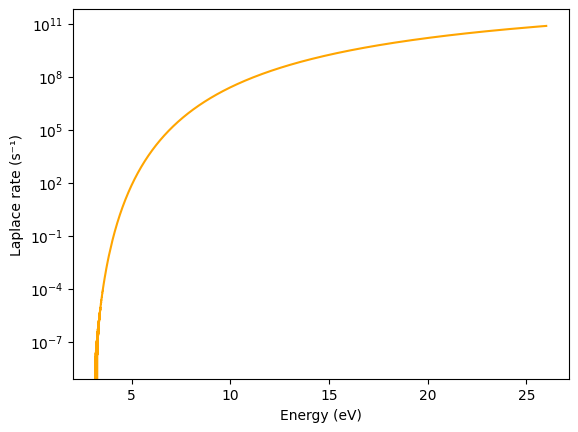

In [12]:
# INVERSE LAPLACE DISSOCIATON RATE

# DOS DATA
df = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-1-cyanonaphthalene\vibs\densum.out',
    skiprows=115,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
T_eff = 1000
h = 6.62607015e-34 
k_B = 1.380649e-23 
E0_cm = 25490                           
cm_to_eV = 1.239841984e-4
cm_grain = 10

# LISTS
C_k_Laplace_list = []
filtered_energies_list = []
energies_list = df["E-Emin"]
density_of_states_list1 = df["Density"].tolist()
density_of_states_list2 = df["Density"].tolist()

# FUNCTIONS
def pre_exponential_factor_1000K(T_eff):
    A_diss_1000K = k_B * T_eff / h
    return A_diss_1000K

def Laplace_dissociation_rate(A_diss_1000K, DOS_E_Ea, DOS_E):
    k_diss_laplace = (A_diss_1000K * DOS_E_Ea) / DOS_E
    return k_diss_laplace
    
# CALCULATIONS
for energy, unchanged_DOS in zip(energies_list, density_of_states_list2):
    if energy <= E0_cm:
        continue

    E_available = energy - E0_cm
    index = int(E_available / cm_grain)

    changed_DOS = density_of_states_list1[index]
    k = Laplace_dissociation_rate(A_diss_1000K=(pre_exponential_factor_1000K(T_eff)), DOS_E_Ea=changed_DOS, DOS_E=unchanged_DOS)
    C_k_Laplace_list.append(k)
    filtered_energies_list.append(energy)

LP_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(LP_filtered_energies_list_eV, C_k_Laplace_list, color='orange')
plt.xlabel('Energy (eV)')
plt.ylabel('Laplace rate (s⁻¹)')
plt.yscale('log')
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\C_LP.png')


Pre-exponential factor for RF: 577413.0178419732 s^-1


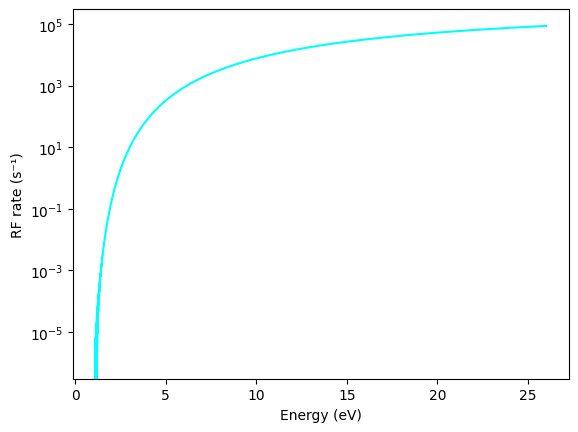

1.1009796817920001


<Figure size 640x480 with 0 Axes>

In [13]:
# Recurrent fluoresence rate

# DOS DATA
df = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-1-cyanonaphthalene\vibs\densum.out',
    skiprows=115,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

# CONSTANTS & PARAMETERS
eps_0 = 8.854e-12   # Vacuum permitivity in C^2 /(N*m^2) or also C^2 /(kg*m^3*s^2)
m_e = 9.109e-31     # Electron mass in kg
e = 1.602e-19       # Elementary charge in C
c = 2.998e8         # Speed of light in m/s
f_osc = 0.011       # Oscillator strength for RF from H. Stocket et al. https://doi.org/10.1038/s41467-023-36092-0. Modeled using Franck-Condon-Herzberg-Teller simulation at the ωB97X-D/cc-pVDZ level of theory.
v_el = 1.10 / h_eV  # Electronic energy in Hz for cation 1-cyanonaphthalene derived from H. Stocket et al. https://doi.org/10.1038/s41467-023-36092-0. 
wave_v_el = 8870    # cm^-1 for cation 1-cyanonaphthalene

# LISTS
k_RF_list = []
filtered_energies_list = []
energies_list = df["E-Emin"].tolist()
density_of_states_list1 = df["Density"].tolist()
density_of_states_list2 = df["Density"].tolist()

# FUNCTIONS
def pre_exponential_factor_RF(v_el, f_osc):
    A_RF = (2 * np.pi * (v_el ** 2) * (e **2) * f_osc) / (eps_0 * m_e * c ** 3)
    return A_RF

print("Pre-exponential factor for RF:", pre_exponential_factor_RF(v_el, f_osc), "s^-1")

def RF_dissociation_rate(A_RF, DOS_E_vel, DOS_E):
    k_RF = (A_RF * DOS_E_vel) / DOS_E
    return k_RF

# CALCULATIONS
for energy, unchanged_DOS in zip(energies_list, density_of_states_list2):
    if energy <= wave_v_el:
        continue

    E_available = energy - wave_v_el
    index = int(E_available / cm_grain)

    changed_DOS = density_of_states_list1[index]
    k = RF_dissociation_rate(A_RF=(pre_exponential_factor_RF(v_el, f_osc)), DOS_E_vel=changed_DOS, DOS_E=unchanged_DOS)
    k_RF_list.append(k)
    filtered_energies_list.append(energy)

RF_filtered_energies_list_eV = [e * cm_to_eV for e in filtered_energies_list]

# OPTIONAL PLOTTING
plt.plot(RF_filtered_energies_list_eV, k_RF_list, color='cyan')
plt.xlabel('Energy (eV)')
plt.ylabel('RF rate (s⁻¹)')
plt.yscale('log')
plt.show()
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\C_RF.png')
print(RF_filtered_energies_list_eV[0])


C:\Users\Mustafa\AppData\Local\Temp\ipykernel_23336\3738050989.py:60: RuntimeWarning: invalid value encountered in scalar divide
  k_IR = (A_IR * DOS_mode_s) / density_of_states_list[idx]


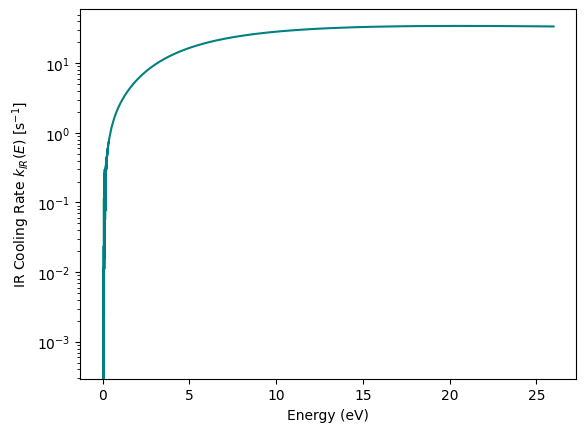

<Figure size 640x480 with 0 Axes>

In [14]:
# THE INFRARED RADIATIVE VIBRATIONAL COOLING RATE 

# WAVENUMBER-INTENSITY & DENSUM DATA
df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\1-cyanonaphthalene\vibs\densum.out',
    skiprows=115,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\pahdb_frequencies\neutral1cyano_transitions.tbl',
    skiprows=11,
    sep='\s+',
    names=["No.", "Wavenumber", "Intensity", "Scale", "Symmetry"])

mode_i_path = r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\1-cyanonaphthalene\vibs\densum_mode_sweeps\mode_{i}\densum.out'
density_mode = {}

for i in range(1, 52):  # Vib modes 1 to 51
    path = mode_i_path.format(i=i)
    if os.path.exists(path):
        df_i = pd.read_csv(path, skiprows=114, sep='\s+', names=["No.", "E-Emin", "Density", "Sum"])
        density_mode[i] = df_i["Density"].values

# LISTS
A_IR_list = []
energy_s_list = []
DOS_list = []
filtered_energies_list = []
wavenumber_list = df2["Wavenumber"].tolist()
intensity_list = df2["Intensity"].tolist()
energies_list = df1["E-Emin"].tolist()
density_of_states_list = df1["Density"].tolist()
N_k_IR_total = np.zeros_like(density_of_states_list) 
DOS_mode_s_dict = {}  # Dictionary to store DOS_mode_s values for each mode

# FUNCTIONS
def einstein_coefficient(wavenumber, intensity):
    A = (1.2512 * 10**(-7)) * (wavenumber ** 2) * intensity
    return A

# CALCULATIONS
for wavenumber, intensity in zip(wavenumber_list, intensity_list):
    A_IR = einstein_coefficient(wavenumber, intensity)
    A_IR_list.append(A_IR)

for mode in range(1, 52):
    wavenumber_s = wavenumber_list[mode - 1]
    rounded_wavenumber = round(wavenumber_s / 10) * 10
    A_IR = A_IR_list[mode - 1]
    # rho_minus_i = density_mode[mode]

    for idx, e in enumerate(energies_list):
        if e <= rounded_wavenumber:
            continue
        E_available = e - rounded_wavenumber
        index = int(E_available / cm_grain)

        DOS_mode_s = density_mode[mode][index]
        k_IR = (A_IR * DOS_mode_s) / density_of_states_list[idx]
        N_k_IR_total[idx] += k_IR

N_IR_energies_list_eV = [e * cm_to_eV for e in energies_list]

# OPTIONAL PLOTTING
plt.plot(N_IR_energies_list_eV, N_k_IR_total, color='teal')
plt.xlabel("Energy (eV)")
plt.ylabel("IR Cooling Rate $k_{IR}(E)$ [s$^{-1}$]")
plt.yscale('log')
plt.show()
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\N_IR.png')

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_23336\804576638.py:58: RuntimeWarning: invalid value encountered in scalar divide
  k_IR = (A_IR * DOS_mode_s) / density_of_states_list[idx]


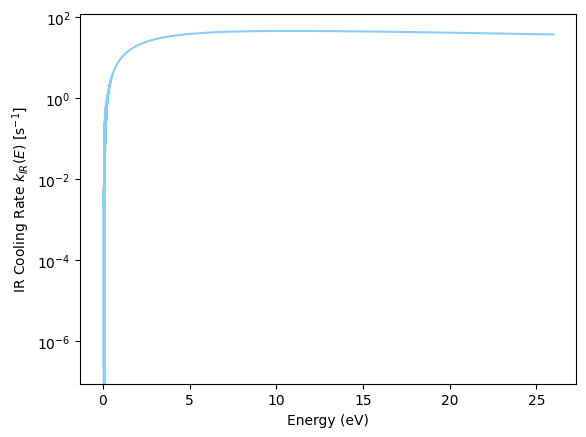

In [15]:
# WAVENUMBER-INTENSITY & DENSUM DATA
df1 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-1-cyanonaphthalene\vibs\densum.out',
    skiprows=115,
    sep='\s+',
    names=["No.", "E-Emin", "Density", "Sum"])

df2 = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\pahdb_frequencies\cation1cyano_transitions.tbl',
    skiprows=11,
    sep='\s+',
    names=["No.", "Wavenumber", "Intensity", "Scale", "Symmetry"])

mode_i_path = r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\Densum_input_1cyano\Models\C-1-cyanonaphthalene\vibs\densum_mode_sweeps\mode_{i}\densum.out'
density_mode = {}

for i in range(1, 52):  # Vib modes 1 to 51
    path = mode_i_path.format(i=i)
    if os.path.exists(path):
        df_i = pd.read_csv(path, skiprows=114, sep='\s+', names=["No.", "E-Emin", "Density", "Sum"])
        density_mode[i] = df_i["Density"].values

# LISTS
A_IR_list = []
energy_s_list = []
DOS_list = []
filtered_energies_list = []
wavenumber_list = df2["Wavenumber"].tolist()
intensity_list = df2["Intensity"].tolist()
energies_list = df1["E-Emin"].tolist()
density_of_states_list = df1["Density"].tolist()
C_k_IR_total = np.zeros_like(density_of_states_list) 
DOS_mode_s_dict = {}  # Dictionary to store DOS_mode_s values for each mode

# FUNCTIONS
def einstein_coefficient(wavenumber, intensity):
    A = (1.2512 * 10**(-7)) * (wavenumber ** 2) * intensity
    return A

# CALCULATIONS
for wavenumber, intensity in zip(wavenumber_list, intensity_list):
    A_IR = einstein_coefficient(wavenumber, intensity)
    A_IR_list.append(A_IR)

for mode in range(1, 52):
    wavenumber_s = wavenumber_list[mode - 1]
    rounded_wavenumber = round(wavenumber_s / 10) * 10
    A_IR = A_IR_list[mode - 1]
    # rho_minus_i = density_mode[mode]

    for idx, e in enumerate(energies_list):
        if e <= rounded_wavenumber:
            continue
        E_available = e - rounded_wavenumber
        index = int(E_available / cm_grain)

        DOS_mode_s = density_mode[mode][index]
        k_IR = (A_IR * DOS_mode_s) / density_of_states_list[idx]
        C_k_IR_total[idx] += k_IR

C_IR_energies_list_eV = [e * cm_to_eV for e in energies_list]

# OPTIONAL PLOTTING
plt.plot(C_IR_energies_list_eV, C_k_IR_total, color='lightskyblue')
plt.xlabel("Energy (eV)")
plt.ylabel("IR Cooling Rate $k_{IR}(E)$ [s$^{-1}$]")
plt.yscale('log')
plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\C_IR.png')

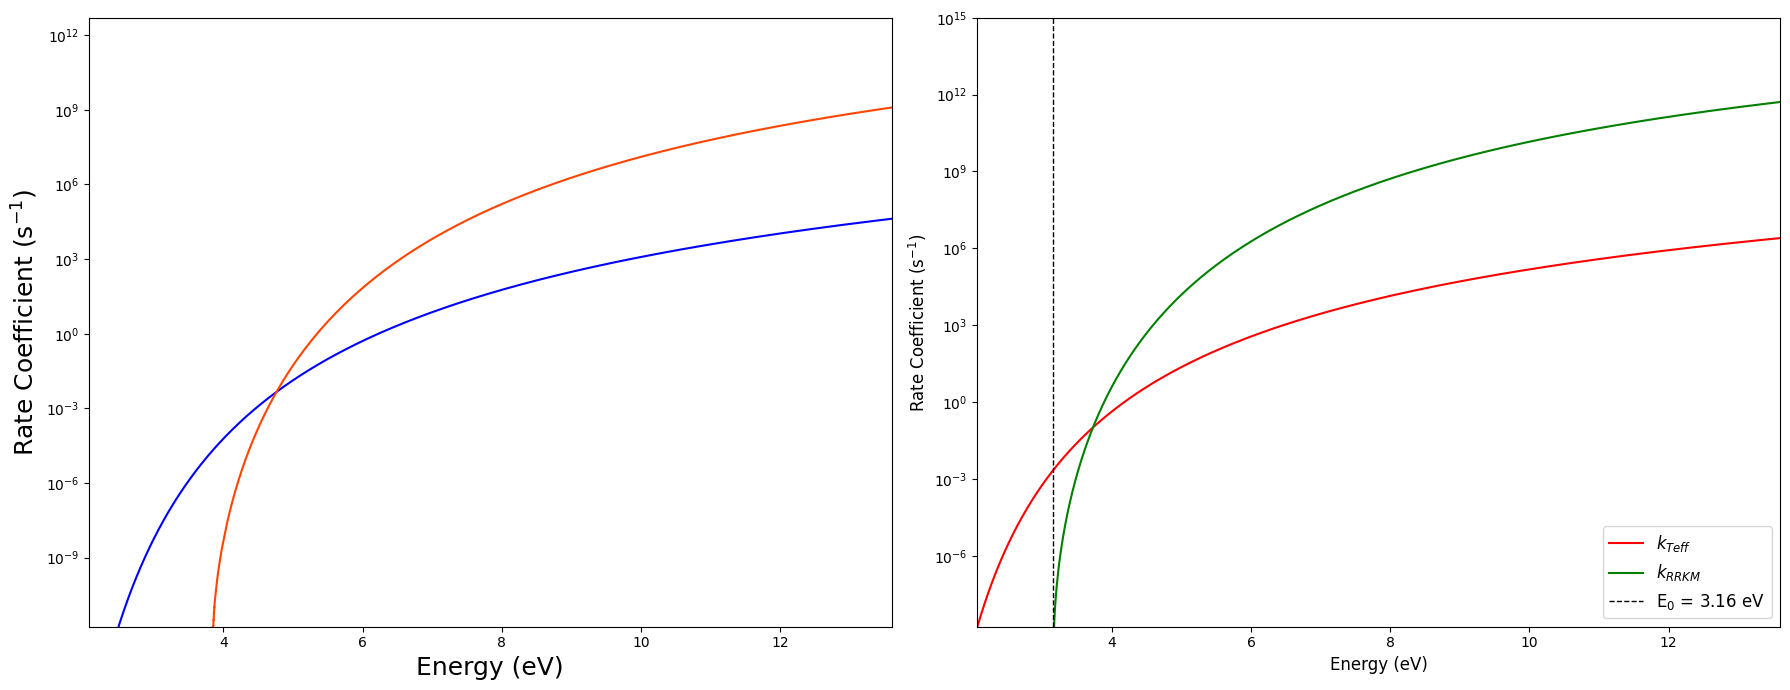

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# NEUTRAL 1-CYANONAPHTHALENE DISSOCIATION RATES
axs[0].plot(NC_energies_list, k_diss_N_list, label='N $k_{Teff}$', color='blue', linestyle='-')
axs[0].plot(N_RRKM_filtered_energies_list_eV, N_k_RRKM_list, label='N $k_{RRKM}$', color='orangered')
#axs[0].axvline(x=3.85, color='black', linestyle='--', linewidth=1, label='E$_0$ = 3.85 eV')
axs[0].set_xlabel('Energy (eV)', fontsize=18)
axs[0].set_ylabel('Rate Coefficient (s$^{-1}$)', fontsize=18)
axs[0].set_yscale('log')
#axs[0].legend()
axs[0].set_ylim(N_k_RRKM_list[0], 5e12)
axs[0].set_xlim(NC_energies_list[0], 13.6)

# CATION 1-CYANONAPHTHALENE DISSOCIATION RATES
axs[1].plot(NC_energies_list, k_diss_C_list, label='$k_{Teff}$', color='red', linestyle='-')
axs[1].plot(C_RRKM_filtered_energies_list_eV, C_k_RRKM_list, label='$k_{RRKM}$', color='green')
axs[1].axvline(x=3.16, color='black', linestyle='--', linewidth=1, label='E$_0$ = 3.16 eV')
axs[1].set_ylabel('Rate Coefficient (s$^{-1}$)', fontsize=12)
axs[1].set_xlabel('Energy (eV)', fontsize = 12)
axs[1].set_yscale('log')
axs[1].legend(fontsize=12)
axs[1].set_ylim(k_diss_C_list[0], 1e15)
axs[1].set_xlim(NC_energies_list[0], 13.6)
plt.tight_layout()

(2.067833848, 13.6)

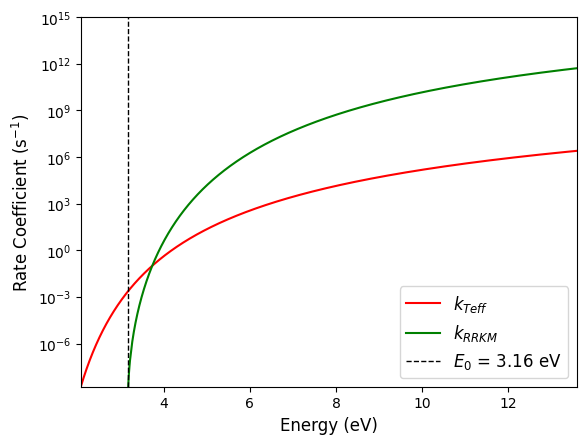

In [17]:
plt.plot(NC_energies_list, k_diss_C_list, label='$k_{Teff}$', color='red', linestyle='-')
plt.plot(C_RRKM_filtered_energies_list_eV, C_k_RRKM_list, label='$k_{RRKM}$', color='green')
plt.axvline(x=3.16, color='black', linestyle='--', linewidth=1, label=r'$E_0$ = 3.16 eV')
plt.ylabel(r'Rate Coefficient (s$^{-1}$)', fontsize=12)
plt.xlabel('Energy (eV)', fontsize=12)
plt.yscale('log')
plt.legend(fontsize=12)
plt.ylim(k_diss_C_list[0], 1e15)
plt.xlim(NC_energies_list[0], 13.6)

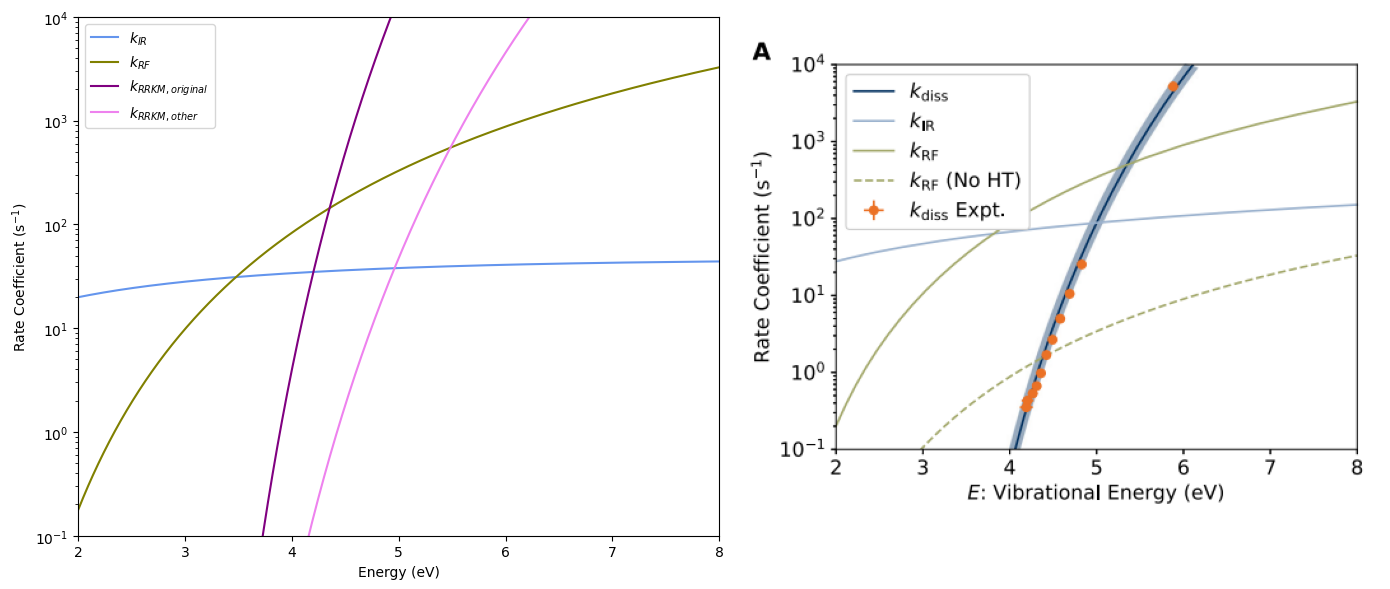

In [18]:
# 1-CYANONAPHTHALENE+ RATE COEFFICIENTS COMPARED TO STOCKETT ET AL. PAPER PLOT
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#axs[0].plot(LP_filtered_energies_list_eV, C_k_Laplace_list, color='darkslategrey', label='$k_{Laplace}$')
axs[0].plot(C_IR_energies_list_eV, C_k_IR_total, color='cornflowerblue', label='$k_{IR}$')
axs[0].plot(RF_filtered_energies_list_eV, k_RF_list, color='olive', label='$k_{RF}$')
axs[0].plot(C_RRKM_filtered_energies_list_eV, C_k_RRKM_list, color='purple', label='$k_{RRKM, original}$')
axs[0].plot(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, color='violet', label='$k_{RRKM, other}$')
# axs[0].plot(NC_energies_list, k_diss_C_list, label='k_Teff', color='red')
axs[0].set_xlabel('Energy (eV)')
axs[0].set_ylabel('Rate Coefficient (s$^{-1}$)')
axs[0].set_yscale('log')
axs[0].legend(loc='upper left')
axs[0].set_xlim(2, 8)
axs[0].set_ylim(1e-1, 1e4)

img = mpimg.imread('PaperplotA.png')
axs[1].imshow(img)
axs[1].axis('off')
plt.tight_layout()

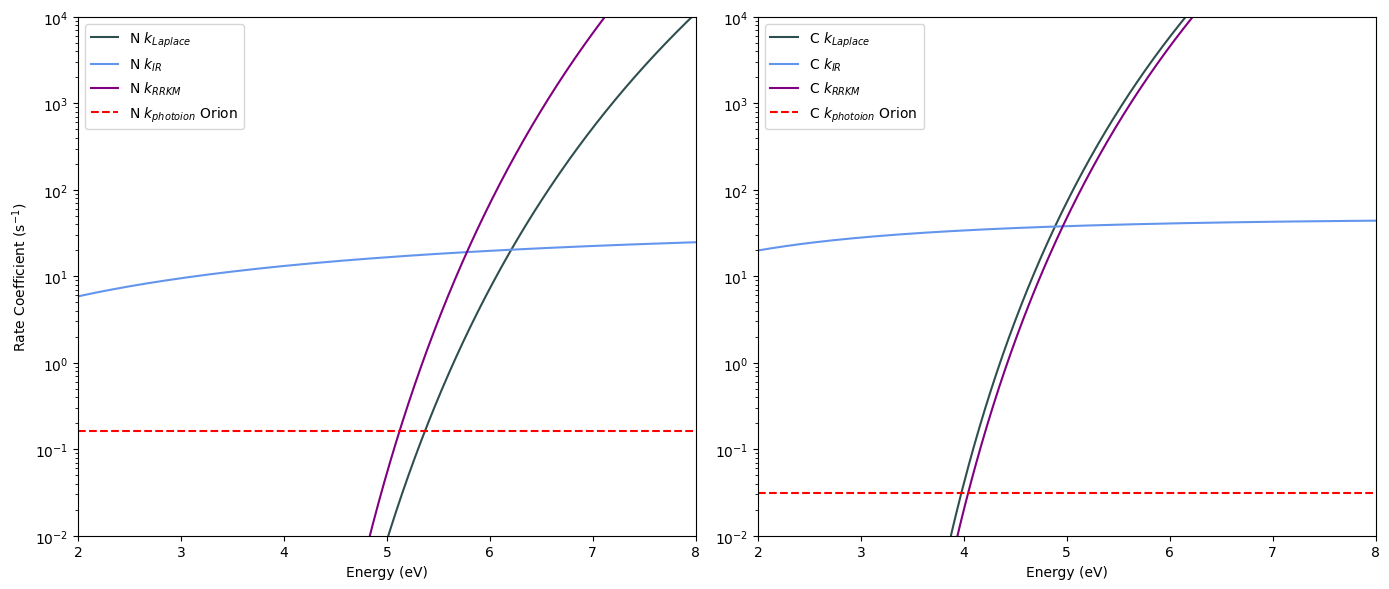

In [19]:
# NEUTRAL AND CATION 1-CYANONAPHTHALENE RATE COEFFICIENTS COMPARISON
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(N_LP_filtered_energies_list_eV, N_k_Laplace_list, color='darkslategrey', label='N $k_{Laplace}$')
axs[0].plot(N_IR_energies_list_eV, N_k_IR_total, color='cornflowerblue', label='N $k_{IR}$')
axs[0].plot(N_RRKM_filtered_energies_list_eV, N_k_RRKM_list, color='purple', label='N $k_{RRKM}$')
axs[0].axhline(y=N_Orion_IF_photoion_point, color='red', linestyle='--', label='N $k_{photoion}$ Orion')
# axs[0].plot(NC_energies_list, k_diss_C_list, label='k_Teff', color='red')
axs[0].set_xlabel('Energy (eV)')
axs[0].set_ylabel('Rate Coefficient (s$^{-1}$)')
axs[0].set_yscale('log')
axs[0].legend(loc='upper left')
axs[0].set_xlim(2, 8)
axs[0].set_ylim(1e-2, 1e4)

axs[1].plot(LP_filtered_energies_list_eV, C_k_Laplace_list, color='darkslategrey', label='C $k_{Laplace}$')
axs[1].plot(C_IR_energies_list_eV, C_k_IR_total, color='cornflowerblue', label='C $k_{IR}$')
axs[1].plot(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, color='purple', label='C $k_{RRKM}$')
axs[1].axhline(y=C_Orion_IF_photoion_point, color='red', linestyle='--', label='C $k_{photoion}$ Orion ')
axs[1].set_xlabel('Energy (eV)')
# axs[1].set_ylabel('Rate Coefficient (s$^{-1}$)')
axs[1].set_yscale('log')
axs[1].legend(loc='upper left')
axs[1].set_xlim(2, 8)
axs[1].set_ylim(1e-2, 1e4)

plt.tight_layout()

(0.01, 10000.0)

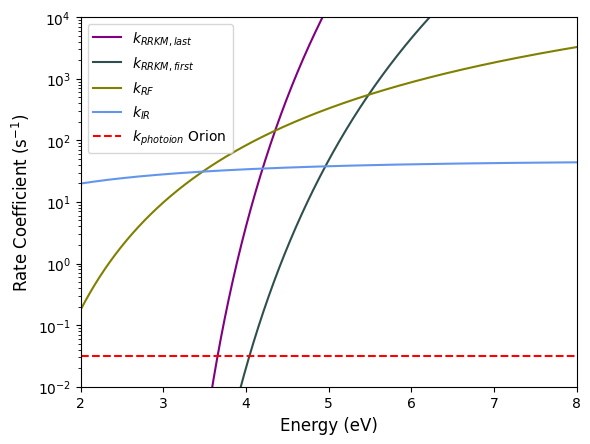

In [20]:
plt.plot(C_RRKM_filtered_energies_list_eV, C_k_RRKM_list, color='purple', label='$k_{RRKM, last}$')
plt.plot(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, color='darkslategrey', label='$k_{RRKM, first}$')
plt.plot(RF_filtered_energies_list_eV, k_RF_list, color='olive', label='$k_{RF}$')
plt.plot(C_IR_energies_list_eV, C_k_IR_total, color='cornflowerblue', label='$k_{IR}$')
plt.axhline(y=C_Orion_IF_photoion_point, color='red', linestyle='--', label='$k_{photoion}$ Orion ')
plt.xlabel('Energy (eV)', fontsize=12)
plt.ylabel(r'Rate Coefficient (s$^{-1}$)', fontsize=12)
plt.yscale('log')
plt.legend(loc='upper left', fontsize=10)
plt.xlim(2, 8)
plt.ylim(1e-2, 1e4)

(0.1, 10000.0)

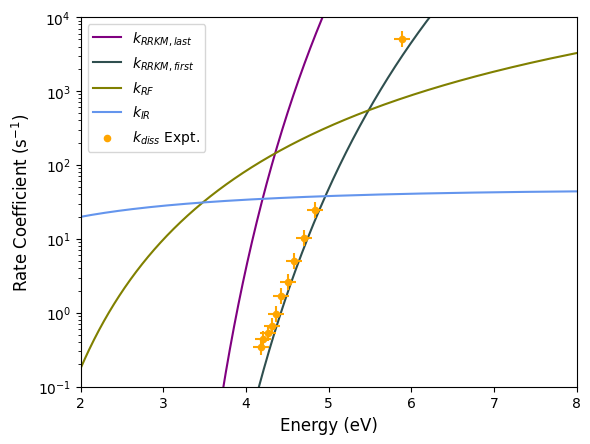

In [21]:
plt.plot(C_RRKM_filtered_energies_list_eV, C_k_RRKM_list, color='purple', label='$k_{RRKM, last}$')
plt.plot(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, color='darkslategrey', label='$k_{RRKM, first}$')
plt.plot(RF_filtered_energies_list_eV, k_RF_list, color='olive', label='$k_{RF}$')
plt.plot(C_IR_energies_list_eV, C_k_IR_total, color='cornflowerblue', label='$k_{IR}$')

exp_df = pd.read_csv(
    r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\Cynapfolder\Database\IRdata\experimental_points.csv',
    skipinitialspace=True
)
plt.scatter(exp_df['x'], exp_df['y'], color='orange', marker='o', s=20, label='$k_{diss}$ Expt.', zorder=9)
plt.scatter(exp_df['x'], exp_df['y'], color='orange', marker='+', s=120, zorder=7)

plt.xlabel('Energy (eV)', fontsize=12)
plt.ylabel(r'Rate Coefficient (s$^{-1}$)', fontsize=12)
plt.yscale('log')
plt.legend(loc='upper left', fontsize=10)
plt.xlim(2, 8)
plt.ylim(1e-1, 1e4)

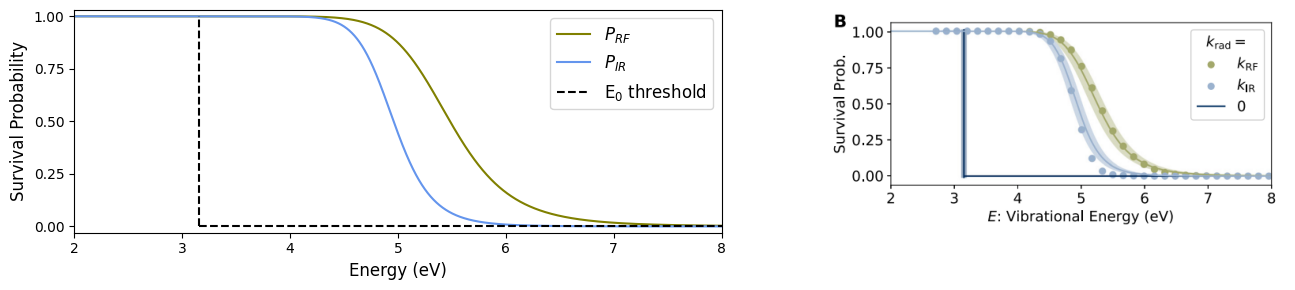

In [30]:
# 1-CYANONAPHTHALENE+ SURVIVAL PROBABILITIES COMPARED TO STOCKETT ET AL. PAPER PLOT
C_threshold_eV = 3.16

interp_other_rrkm = interp1d(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, bounds_error=False, fill_value="extrapolate")
interp_RF = interp1d(RF_filtered_energies_list_eV, k_RF_list, bounds_error=False, fill_value="extrapolate")

C_k_other_rrkm_interp = interp_other_rrkm(C_IR_energies_list_eV)
k_RF_interp = interp_RF(C_IR_energies_list_eV)

C_survival_prob_IR = C_k_IR_total / (C_k_other_rrkm_interp + C_k_IR_total)
C_survival_prob_RF = k_RF_interp / (C_k_other_rrkm_interp + k_RF_interp)

fig, axs = plt.subplots(1, 2, figsize=(14, 3))

axs[0].plot(C_IR_energies_list_eV, C_survival_prob_RF, color='olive', label='$P_{RF}$')
axs[0].plot(C_IR_energies_list_eV, C_survival_prob_IR, color='cornflowerblue', label='$P_{IR}$')
axs[0].plot([C_threshold_eV, C_threshold_eV], [0, 1], color='black', linestyle='--', label='E$_0$ threshold')
axs[0].plot([C_threshold_eV, 8], [0, 0], color='black', linestyle='--')
axs[0].set_xlabel("Energy (eV)", fontsize=12)
axs[0].set_ylabel("Survival Probability", fontsize=12)
axs[0].set_yticks(np.arange(0, 1.25, 0.25))
axs[0].set_ylim(-0.03, 1.03)
axs[0].set_xlim(2, 8)
axs[0].legend(loc='upper right', fontsize=12)

img = mpimg.imread('PaperplotB.png') 
axs[1].imshow(img)
axs[1].axis('off')

plt.tight_layout()
plt.show()

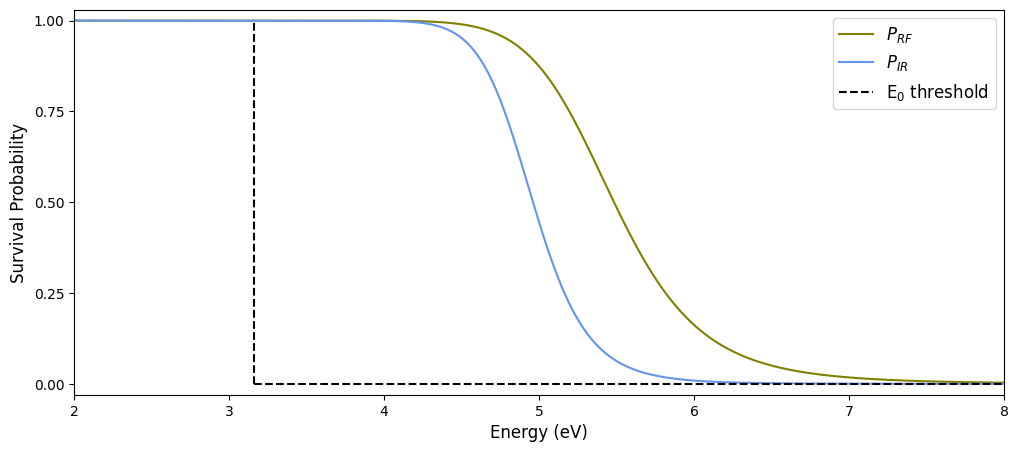

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(C_IR_energies_list_eV, C_survival_prob_RF, color='olive', label='$P_{RF}$')
plt.plot(C_IR_energies_list_eV, C_survival_prob_IR, color='cornflowerblue', label='$P_{IR}$')
plt.plot([C_threshold_eV, C_threshold_eV], [0, 1], color='black', linestyle='--', label='E$_0$ threshold')
plt.plot([C_threshold_eV, 8], [0, 0], color='black', linestyle='--')
plt.xlabel("Energy (eV)", fontsize = 12)
plt.ylabel("Survival Probability", fontsize = 12)
plt.yticks(np.arange(0, 1.25, 0.25))
plt.ylim(-0.03, 1.03)
plt.xlim(2, 8)
plt.legend(loc='upper right', fontsize = 12)

(0.1, 10000.0)

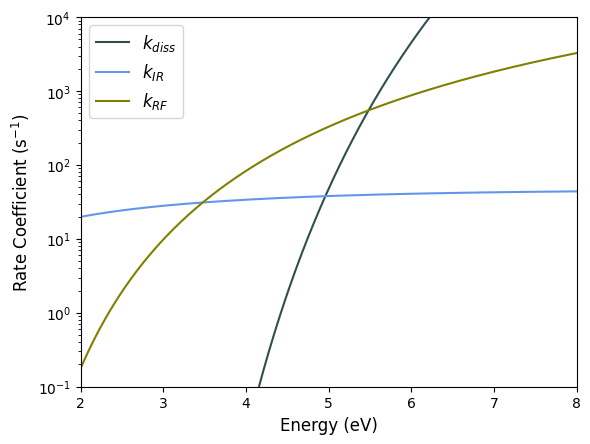

In [24]:
# 1-CYANONAPHTHALENE+ ALL RATE COEFFICIENTS COMBINED PLOT
#plt.plot(LP_filtered_energies_list_eV, C_k_Laplace_list, color='darkslategrey', label='$k_{Laplace}$')
plt.plot(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, color='darkslategrey', label='$k_{diss}$') 
plt.plot(C_IR_energies_list_eV, C_k_IR_total, color='cornflowerblue', label='$k_{IR}$')
plt.plot(RF_filtered_energies_list_eV, k_RF_list, color='olive', label='$k_{RF}$')
#plt.plot(C_RRKM_filtered_energies_list_eV, C_k_RRKM_list, color='purple', label='$k_{RRKM, original}$')
#$k_{RRKM, other}
plt.xlabel('Energy (eV)', fontsize=12)
plt.ylabel('Rate Coefficient (s$^{-1}$)', fontsize=12)
plt.yscale('log')
plt.legend(loc='upper left', fontsize=12)
plt.xlim(2, 8)
plt.ylim(1e-1, 1e4)
#plt.savefig(r'C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\Cation-1cyano-rates.png')

Overall average energy: 3.9713438975754856
All molecules destroyed after 55.76 years.
The average lifetime for a molecule is 27.88 years.


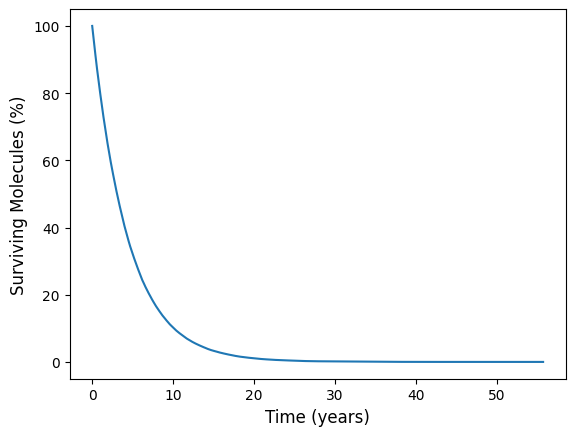

Total number of destructions: 100000
Total number of IR events: 1209
Total number of RF events: 9282


In [25]:
# MONTE CARLO SIMULATION FOR 1-CYANONAPHTHALENE+ (VECTORIZED)
# SOURCES:
# https://www.sciencedirect.com/science/article/pii/S0168583X24001575?via%3Dihub
# https://chem.libretexts.org/Courses/Grinnell_College/CHM_364%3A_Physical_Chemistry_2_%28Grinnell_College%29/13%3A_Lasers_Laser_Spectroscopy_and_Photochemistry/13.01%3A_Electronically_Excited_Molecules_can_Relax_by_a_Number_of_Processes
# https://www.aanda.org/articles/aa/full_html/2012/07/aa18347-11/aa18347-11.html#:~:text=Context.,the%20different%20local%20physical%20conditions
# https://www.aanda.org/articles/aa/pdf/2015/05/aa25014-14.pdf 

# PARAMETERS FOR MONTE CARLO SIMULATION
num_molecules = 100000
E_min = 3.82  # eV, lower limit
E_max = 13.6   # eV, upper limit
Nc = 11
G0 = 1 # FUV Habing field of a region
t_uv = 1.4e9 / (Nc * G0)
dt = 3.1536e7 / 10  # 1/10th of a year per step

# LISTS AND ARRAYS
interp_RRKM = interp1d(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, bounds_error=False, fill_value=0)
interp_IR = interp1d(C_IR_energies_list_eV, C_k_IR_total, bounds_error=False, fill_value=0)
interp_RF = interp1d(RF_filtered_energies_list_eV, k_RF_list, bounds_error=False, fill_value=0)
molecule_energies = np.full(num_molecules, E_min)
molecule_alive = np.ones(num_molecules, dtype=bool)
molecule_excited = np.zeros(num_molecules, dtype=bool)
survival_history = []
time_history = []
total_average = []

# EVENT COUNTERS
rf_count = 0
ir_count = 0
destruction_count = 0

t = 0
current_time = 0.0
while np.any(molecule_alive):
    alive_mask = molecule_alive

    E = molecule_energies[alive_mask]
    idx = np.where(alive_mask)[0]
    was_excited = molecule_excited[idx]

    # RATES
    k_RRKM = interp_RRKM(E)
    k_IR = interp_IR(E) 
    k_RF = interp_RF(E) 
    
    # THRESHOLDS
    k_RRKM[E < other_C_RRKM_filtered_energies_list_eV[0]] = 0
    k_RF[E < RF_filtered_energies_list_eV[0]] = 0
    k_RRKM[~was_excited] = 0
    k_IR[~was_excited] = 0
    k_RF[~was_excited] = 0

    # PROBABILITIES
    p_RRKM = k_RRKM * dt
    p_IR = k_IR * dt
    p_RF = k_RF * dt
    p_FUV_arr = np.full_like(p_RRKM, dt / t_uv)

    # NORMALIZATION
    p_sum = p_RRKM + p_IR + p_RF + p_FUV_arr
    over_one = p_sum > 1
    p_RRKM[over_one] /= p_sum[over_one]
    p_IR[over_one]   /= p_sum[over_one]
    p_RF[over_one]   /= p_sum[over_one]
    p_FUV_arr[over_one] /= p_sum[over_one]

    rand = np.random.rand(np.sum(alive_mask))
    rrkm_mask = rand < p_RRKM
    ir_mask = (rand >= p_RRKM) & (rand < p_RRKM + p_IR)
    rf_mask = (rand >= p_RRKM + p_IR) & (rand < p_RRKM + p_IR + p_RF)
    fuv_mask = (rand >= p_RRKM + p_IR + p_RF) & (rand < p_RRKM + p_IR + p_RF + p_FUV_arr)

    # EVENT COUNTS
    destruction_count += np.sum(rrkm_mask)
    ir_count += np.sum(ir_mask)
    rf_count += np.sum(rf_mask)

    # UPDATE MOLECULE INTERNAL ENERGY
    molecule_alive[idx[rrkm_mask]] = False

    molecule_energies[idx[ir_mask]] = E_min
    molecule_excited[idx[ir_mask]] = False  # Reset excited state for IR events

    molecule_energies[idx[rf_mask]] = E_min
    molecule_excited[idx[rf_mask]] = False  # Reset excited state for RF events

    E_FUV_GAIN = np.random.uniform(0.5, 13.6, size=np.sum(fuv_mask))
    molecule_energies[idx[fuv_mask]] = np.minimum(E[fuv_mask] + E_FUV_GAIN, E_max)
    molecule_excited[idx[fuv_mask]] = True 

    # APPEND HISTORIES
    survival_history.append(np.sum(molecule_alive))
    time_history.append(current_time)
    avg_energy = np.mean(molecule_energies[molecule_alive]) if np.any(molecule_alive) else 0
    total_average.append(avg_energy)

    current_time += dt
    t += 1

# FINAL AVERAGE ENERGY
overall_avg_energy = np.mean(total_average)
print("Overall average energy:", overall_avg_energy)

# TIME TO ZERO MOLECULES
years_to_zero = time_history[-1] / 3.15576e7
print(f"All molecules destroyed after {years_to_zero:.2f} years.")
print(f"The average lifetime for a molecule is {np.mean(time_history) / 3.15576e7:.2f} years.")
os.makedirs(r"C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots", exist_ok=True)

# PLOTS
plt.plot(np.array(time_history) / 3.15576e7, 100 * np.array(survival_history) / num_molecules)
plt.xlabel('Time (years)', fontsize = 12)
plt.ylabel('Surviving Molecules (%)', fontsize = 12)
plt.savefig(fr"C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\{G0}_montecarlo_cpy+.png")
plt.show()

# event_labels = ['Destruction', 'IR Cooling', 'RF']
# event_counts = [destruction_count, ir_count, rf_count]
# plt.bar(event_labels, event_counts, color=['red', 'blue', 'olive'], edgecolor='black')
# plt.ylabel('Number of Events')
# plt.show()

print("Total number of destructions:", destruction_count)
print("Total number of IR events:", ir_count) 
print("Total number of RF events:", rf_count)

Average energy over 1000 runs: 6.6614 eV
Average lifetime over 1000 runs: 0.35 years
Average years to zero molecules over 1000 runs: 0.82 years
Standard deviation of years to zero molecules over 1000 runs: 0.13 years
Variance of years to zero molecules over 1000 runs: 0.02 years
Maximum difference in years to zero molecules over 1000 runs: 0.80 years


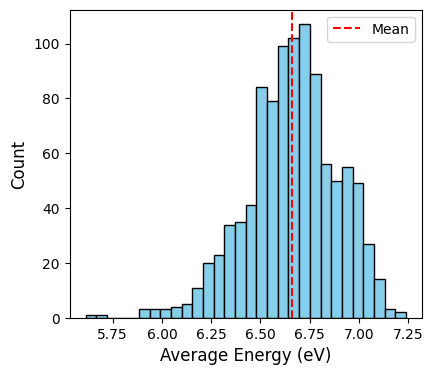

In [26]:
# MULTIPLE MONTE CARLO SIMULATION FOR 1-CYANONAPHTHALENE+ (VECTORIZED)

n = 1000  # Number of Monte Carlo runs
num_molecules = 10000
E_min = 3.82  # eV, lower limit
E_max = 13.6   # eV, upper limit
Nc = 11
G0 = 300000 # FUV Habing field for a region
t_uv = 1.4e9 / (Nc * G0)
dt = 3.1536e7 / 10  # e.g. 1/10th of a year per step

interp_RRKM = interp1d(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, bounds_error=False, fill_value=0)
interp_IR = interp1d(C_IR_energies_list_eV, C_k_IR_total, bounds_error=False, fill_value=0)
interp_RF = interp1d(RF_filtered_energies_list_eV, k_RF_list, bounds_error=False, fill_value=0)

all_avg_energies = []
all_years_to_zero = []

for run in range(n):
    molecule_energies = np.full(num_molecules, E_min)
    molecule_alive = np.ones(num_molecules, dtype=bool)
    molecule_excited = np.zeros(num_molecules, dtype=bool)
    total_average = []
    time_history = []
    t = 0
    current_time = 0.0

    while np.any(molecule_alive):
        alive_mask = molecule_alive
        E = molecule_energies[alive_mask]
        idx = np.where(alive_mask)[0]
        was_excited = molecule_excited[idx]

        k_RRKM = interp_RRKM(E)
        k_IR = interp_IR(E) 
        k_RF = interp_RF(E) 

        k_RRKM[E < other_C_RRKM_filtered_energies_list_eV[0]] = 0
        k_RF[E < RF_filtered_energies_list_eV[0]] = 0
        k_RRKM[~was_excited] = 0
        k_IR[~was_excited] = 0
        k_RF[~was_excited] = 0

        p_RRKM = k_RRKM * dt
        p_IR = k_IR * dt
        p_RF = k_RF * dt
        p_FUV_arr = np.full_like(p_RRKM, dt / t_uv)

        p_sum = p_RRKM + p_IR + p_RF + p_FUV_arr
        over_one = p_sum > 1
        p_RRKM[over_one] /= p_sum[over_one]
        p_IR[over_one]   /= p_sum[over_one]
        p_RF[over_one]   /= p_sum[over_one]
        p_FUV_arr[over_one] /= p_sum[over_one]

        rand = np.random.rand(np.sum(alive_mask))
        rrkm_mask = rand < p_RRKM
        ir_mask = (rand >= p_RRKM) & (rand < p_RRKM + p_IR)
        rf_mask = (rand >= p_RRKM + p_IR) & (rand < p_RRKM + p_IR + p_RF)
        fuv_mask = (rand >= p_RRKM + p_IR + p_RF) & (rand < p_RRKM + p_IR + p_RF + p_FUV_arr)

        molecule_alive[idx[rrkm_mask]] = False

        molecule_energies[idx[ir_mask]] = E_min
        molecule_excited[idx[ir_mask]] = False  # Reset excited state for IR events

        molecule_energies[idx[rf_mask]] = E_min
        molecule_excited[idx[rf_mask]] = False # Reset excited state for RF events
 
        E_FUV_GAIN = np.random.uniform(0.5, 13.6, size=np.sum(fuv_mask))
        molecule_energies[idx[fuv_mask]] = np.minimum(E[fuv_mask] + E_FUV_GAIN, E_max)
        molecule_excited[idx[fuv_mask]] = True 

        time_history.append(current_time)
        avg_energy = np.mean(molecule_energies[molecule_alive]) if np.any(molecule_alive) else 0
        total_average.append(avg_energy)

        current_time += dt
        t += 1

    # STORE AVERAGES
    all_avg_energies.append(np.mean(total_average))
    all_avg_lifetime = np.mean(time_history) / 3.15576e7  
    all_years_to_zero.append(time_history[-1] / 3.15576e7)

# CALCULATE & PRINT AVERAGES
overall_avg_energy = np.mean(all_avg_energies)
overall_avg_years_to_zero = np.mean(all_years_to_zero)
overall_std_years_to_zero = np.std(all_years_to_zero)
overall_var_years_to_zero = np.var(all_years_to_zero)
overall_avg_lifetime = np.mean(all_avg_lifetime)
max_difference_years_to_zero = np.max(all_years_to_zero) - np.min(all_years_to_zero)
print(f"Average energy over {n} runs: {overall_avg_energy:.4f} eV")
print(f"Average lifetime over {n} runs: {all_avg_lifetime:.2f} years")
print(f"Average years to zero molecules over {n} runs: {overall_avg_years_to_zero:.2f} years")
print(f"Standard deviation of years to zero molecules over {n} runs: {overall_std_years_to_zero:.2f} years")
print(f"Variance of years to zero molecules over {n} runs: {overall_var_years_to_zero:.2f} years")
print(f"Maximum difference in years to zero molecules over {n} runs: {max_difference_years_to_zero:.2f} years")

# SAVE RESULTS TO CSV
results_dict = {
    "n_simulations": n,
    "num_molecules": num_molecules,
    "G0": G0,
    "overall_avg_years_to_zero": overall_avg_years_to_zero,
    "overall_std_years_to_zero": overall_std_years_to_zero,
    "overall_avg_lifetime": overall_avg_lifetime,
    "overall_avg_energy": overall_avg_energy
    }

tsv_path = r"C:\Users\Mustafa\Documents\GitHub\Project-Cynap\runs\new2_cyanonaphthalene+_results.tsv"
write_header = not os.path.exists(tsv_path)
results_df = pd.DataFrame([results_dict])
results_df.to_csv(tsv_path, mode='a', header=write_header, index=False, sep='\t')
os.makedirs(r"C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots", exist_ok=True)

#HISTOGRAM PLOTS AVG ENERGY AND YEARS TO ZERO
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(all_avg_energies, bins=30, color='skyblue', edgecolor='black')
plt.axvline(overall_avg_energy, color='red', linestyle='--', label='Mean')
plt.xlabel('Average Energy (eV)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()

# plt.subplot(1, 2, 2)
# plt.hist(all_years_to_zero, bins=30, color='lightgreen', edgecolor='black')
# plt.axvline(overall_avg_years_to_zero, color='red', linestyle='--', label='Mean')
# plt.xlabel('Years to Zero Molecules')
# plt.ylabel('Count')
# plt.legend()
# plt.savefig(fr"C:\Users\Mustafa\Documents\GitHub\Project-Cynap\plots\{G0}_years_to_zero_cnp+.png")

# plt.tight_layout()
# plt.show()

In [27]:
energies_eV = np.linspace(3.2, 4.0, 9)  # 3.2, 3.3, ..., 4.0 eV
dt = 3.1536e7 / 10  # same as in your MC simulation

interp_C_RRKM = interp1d(C_RRKM_filtered_energies_list_eV, C_k_RRKM_list, bounds_error=False, fill_value=0)
interp_other_C_RRKM = interp1d(other_C_RRKM_filtered_energies_list_eV, other_C_k_RRKM_list, bounds_error=False, fill_value=0)
interp_IR = interp1d(C_IR_energies_list_eV, C_k_IR_total, bounds_error=False, fill_value=0)
interp_RF = interp1d(RF_filtered_energies_list_eV, k_RF_list, bounds_error=False, fill_value=0)

print(f"{'Energy (eV)':>12} | {'k_RRKM (orig)':>15} | {'p_RRKM (orig)':>15} | {'k_RRKM (other)':>15} | {'p_RRKM (other)':>15} | {'k_IR':>10} | {'p_IR':>10} | {'k_RF':>10} | {'p_RF':>10}")
print("-"*140)
for E in energies_eV:
    k_orig = interp_C_RRKM(E)
    k_other = interp_other_C_RRKM(E)
    k_ir = interp_IR(E)
    k_rf = interp_RF(E)
    p_orig = k_orig * dt
    p_other = k_other * dt
    p_ir = k_ir * dt
    p_rf = k_rf * dt
    print(f"{E:12.2f} | {k_orig:15.3e} | {p_orig:15.3e} | {k_other:15.3e} | {p_other:15.3e} | {k_ir:10.3e} | {p_ir:10.3e} | {k_rf:10.3e} | {p_rf:10.3e}")

 Energy (eV) |   k_RRKM (orig) |   p_RRKM (orig) |  k_RRKM (other) |  p_RRKM (other) |       k_IR |       p_IR |       k_RF |       p_RF
--------------------------------------------------------------------------------------------------------------------------------------------
        3.20 |       3.731e-08 |       1.177e-01 |       1.986e-09 |       6.262e-03 |  2.936e+01 |  9.260e+07 |  1.646e+01 |  5.191e+07
        3.30 |       5.623e-06 |       1.773e+01 |       1.146e-07 |       3.614e-01 |  3.000e+01 |  9.460e+07 |  2.091e+01 |  6.595e+07
        3.40 |       1.315e-04 |       4.146e+02 |       1.739e-06 |       5.483e+00 |  3.061e+01 |  9.653e+07 |  2.624e+01 |  8.274e+07
        3.50 |       1.502e-03 |       4.736e+03 |       1.509e-05 |       4.757e+01 |  3.120e+01 |  9.840e+07 |  3.255e+01 |  1.026e+08
        3.60 |       1.130e-02 |       3.565e+04 |       9.291e-05 |       2.930e+02 |  3.177e+01 |  1.002e+08 |  3.995e+01 |  1.260e+08
        3.70 |       6.407e-02 |     

100%|██████████| 10/10 [04:18<00:00, 25.81s/it]


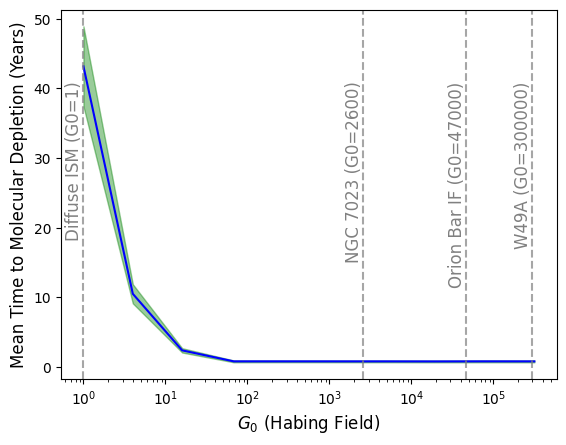

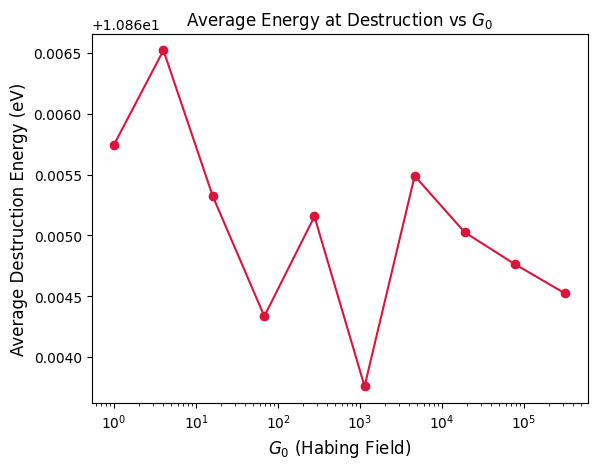

In [28]:
G0_values = np.logspace(0, 5.5, 10, dtype=int)  # 10 values from 1 to ~300,000
avg_years_to_zero_list = []
std_years_to_zero_list = []
avg_destruction_energy_list = [] 

for G0 in tqdm.tqdm(G0_values):
    n = 1000  
    num_molecules = 10000
    Nc = 11
    t_uv = 1.4e9 / (Nc * G0)
    dt = 3.1536e7 / 10

    all_years_to_zero = []
    destruction_energies = []

    for run in range(n):
        molecule_energies = np.full(num_molecules, E_min)
        molecule_alive = np.ones(num_molecules, dtype=bool)
        molecule_excited = np.zeros(num_molecules, dtype=bool)
        time_history = []
        current_time = 0.0

        while np.any(molecule_alive):
            alive_mask = molecule_alive
            E = molecule_energies[alive_mask]
            idx = np.where(alive_mask)[0]
            was_excited = molecule_excited[idx]

            k_RRKM = interp_RRKM(E)
            k_IR = interp_IR(E)
            k_RF = interp_RF(E)

            k_RRKM[E < other_C_RRKM_filtered_energies_list_eV[0]] = 0
            k_RF[E < RF_filtered_energies_list_eV[0]] = 0
            k_RRKM[~was_excited] = 0
            k_IR[~was_excited] = 0
            k_RF[~was_excited] = 0

            p_RRKM = k_RRKM * dt
            p_IR = k_IR * dt
            p_RF = k_RF * dt
            p_FUV_arr = np.full_like(p_RRKM, dt / t_uv)

            p_sum = p_RRKM + p_IR + p_RF + p_FUV_arr
            over_one = p_sum > 1
            p_RRKM[over_one] /= p_sum[over_one]
            p_IR[over_one]   /= p_sum[over_one]
            p_RF[over_one]   /= p_sum[over_one]
            p_FUV_arr[over_one] /= p_sum[over_one]

            rand = np.random.rand(np.sum(alive_mask))
            rrkm_mask = rand < p_RRKM
            ir_mask = (rand >= p_RRKM) & (rand < p_RRKM + p_IR)
            rf_mask = (rand >= p_RRKM + p_IR) & (rand < p_RRKM + p_IR + p_RF)
            fuv_mask = (rand >= p_RRKM + p_IR + p_RF) & (rand < p_RRKM + p_IR + p_RF + p_FUV_arr)

            destruction_energies.extend(E[rrkm_mask])

            molecule_alive[idx[rrkm_mask]] = False
            molecule_energies[idx[ir_mask]] = E_min
            molecule_excited[idx[ir_mask]] = False
            molecule_energies[idx[rf_mask]] = E_min
            molecule_excited[idx[rf_mask]] = False
            E_FUV_GAIN = np.random.uniform(0.5, 13.6, size=np.sum(fuv_mask))
            molecule_energies[idx[fuv_mask]] = np.minimum(E[fuv_mask] + E_FUV_GAIN, E_max)
            molecule_excited[idx[fuv_mask]] = True

            time_history.append(current_time)
            current_time += dt

        all_years_to_zero.append(time_history[-1] / 3.15576e7)

    avg_years_to_zero_list.append(np.mean(all_years_to_zero))
    std_years_to_zero_list.append(np.std(all_years_to_zero))
    avg_destruction_energy_list.append(np.mean(destruction_energies))

# REAL ASTROPHYSICAL REGIONS ANNOTATIONS
astro_G0s = [1, 2600, 47000, 300000]
astro_labels = [
    "Diffuse ISM (G0=1)",
    "NGC 7023 (G0=2600)",
    "Orion Bar IF (G0=47000)",
    "W49A (G0=300000)"
]

# PLOTTING
# plt.plot(G0_values, avg_years_to_zero_list, color='blue')
avg = np.array(avg_years_to_zero_list)
std = np.array(std_years_to_zero_list)
plt.plot(G0_values, avg, color='blue')
plt.fill_between(G0_values, avg-std, avg+std, color='green', alpha=0.4, label='Std. Dev.')
plt.xscale('log')
plt.xlabel(r'$G_0$ (Habing Field)', fontsize=12)
plt.ylabel('Mean Time to Molecular Depletion (Years)', fontsize = 12)
for g0, label in zip(astro_G0s, astro_labels):
    plt.axvline(g0, color='gray', linestyle='--', alpha=0.7)
    plt.text(g0, plt.ylim()[1]*0.8, label, rotation=90, va='top', ha='right', fontsize=12, color='gray')
#plt.legend(fontsize = 12)
plt.show()

plt.figure()
plt.plot(G0_values, avg_destruction_energy_list, marker='o', color='crimson')
plt.xscale('log')
plt.xlabel(r'$G_0$ (Habing Field)', fontsize=12)
plt.ylabel('Average Destruction Energy (eV)', fontsize=12)
plt.title('Average Energy at Destruction vs $G_0$')
plt.show()